In [3]:
# https://github.com/tensorflow/examples/blob/master/lite/codelabs/digit_classifier/ml/step2_train_ml_model.ipynb
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
print(tf.__version__)

2.13.0


In [43]:
# Keras provides a handy API to download the MNIST dataset, and split them into
# "train" dataset and "test" dataset
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(" type of 'mnist' is %s" % type(mnist))
print(" type of 'train images' is %s" % type(train_images))
print(" type of 'train labels' is %s" % type(train_labels))
print(" Shape of train images", train_images.shape)
print(" number of train images is %s" % train_images.shape[0])
print(" shape of a train image is %dx%d" % (train_images.shape[1], train_images.shape[2]))
print(" number of train labels is %s" % train_labels.shape)
print(" type of 'test images' is %s" % type(test_images))
print(" type of 'test labels' is %s" % type(test_labels))
print(" Shape of test images", test_images.shape)
print(" number of test images is %d" % test_images.shape[0])
print(" shape of a test image is %dx%d" % (test_images.shape[1], test_images.shape[2]))
print(" number of test labels is %s" % test_labels.shape)

 type of 'mnist' is <class 'module'>
 type of 'train images' is <class 'numpy.ndarray'>
 type of 'train labels' is <class 'numpy.ndarray'>
 Shape of train images (60000, 28, 28)
 number of train images is 60000
 shape of a train image is 28x28
 number of train labels is 60000
 type of 'test images' is <class 'numpy.ndarray'>
 type of 'test labels' is <class 'numpy.ndarray'>
 Shape of test images (10000, 28, 28)
 number of test images is 10000
 shape of a test image is 28x28
 number of test labels is 10000


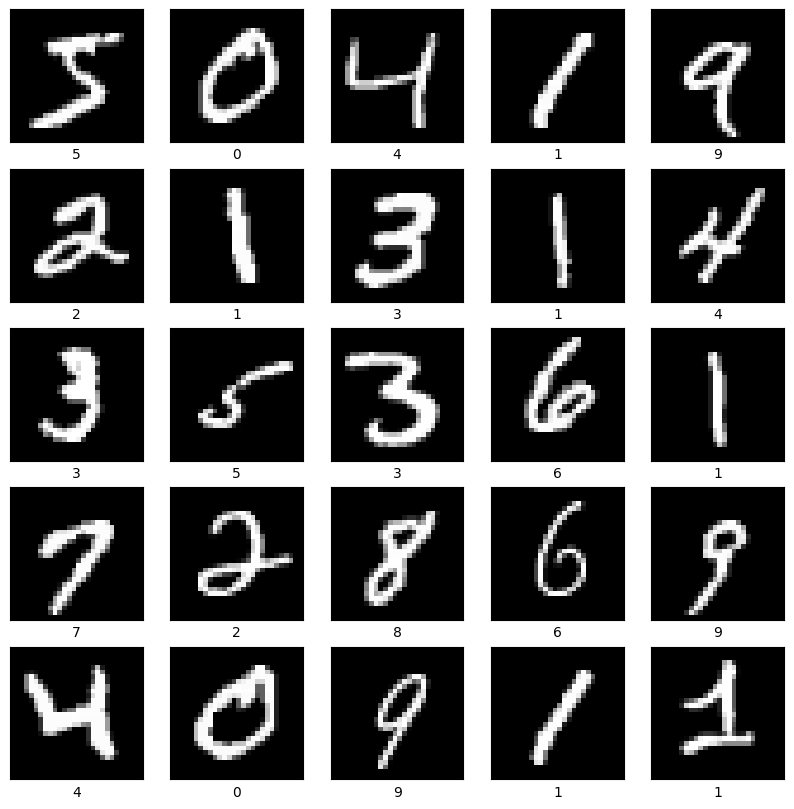

In [45]:
# Normalize the input image so that each pixel value is between 0 to 1
train_images = train_images / 255.0;
test_images = test_images / 255.0;

# Show the first 25 images in the training dataset
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.gray)
    plt.xlabel(train_labels[i])
plt.show()

In [46]:
# Our model takes a 28px x 28px grayscale image as an input, 
# and outputs a float array of length 10 representing the probability of the 
# image being a digit from 0 to 9.

# Use a simple convolutional neural network
# Define the model architecture
model = keras.Sequential([
    keras.layers.InputLayer(input_shape=(28, 28)),
    keras.layers.Reshape(target_shape=(28, 28, 1)),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(10)
])

# Define how to train the model
model.compile(optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

# Train the digit classification model
model.fit(train_images, train_labels, epochs=5)

model.summary()

Epoch 1/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.6908 - accuracy: 0.7826
Epoch 2/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.3264 - accuracy: 0.9041
Epoch 3/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2981 - accuracy: 0.9123
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2817 - accuracy: 0.9176
Epoch 5/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2724 - accuracy: 0.9198
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
   

In [47]:
# Evaluate the model using all images in the test dataset.
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2365 - accuracy: 0.9346
Test accuracy: 0.9345999956130981


313/313 [==============================] - 1s 4ms/step


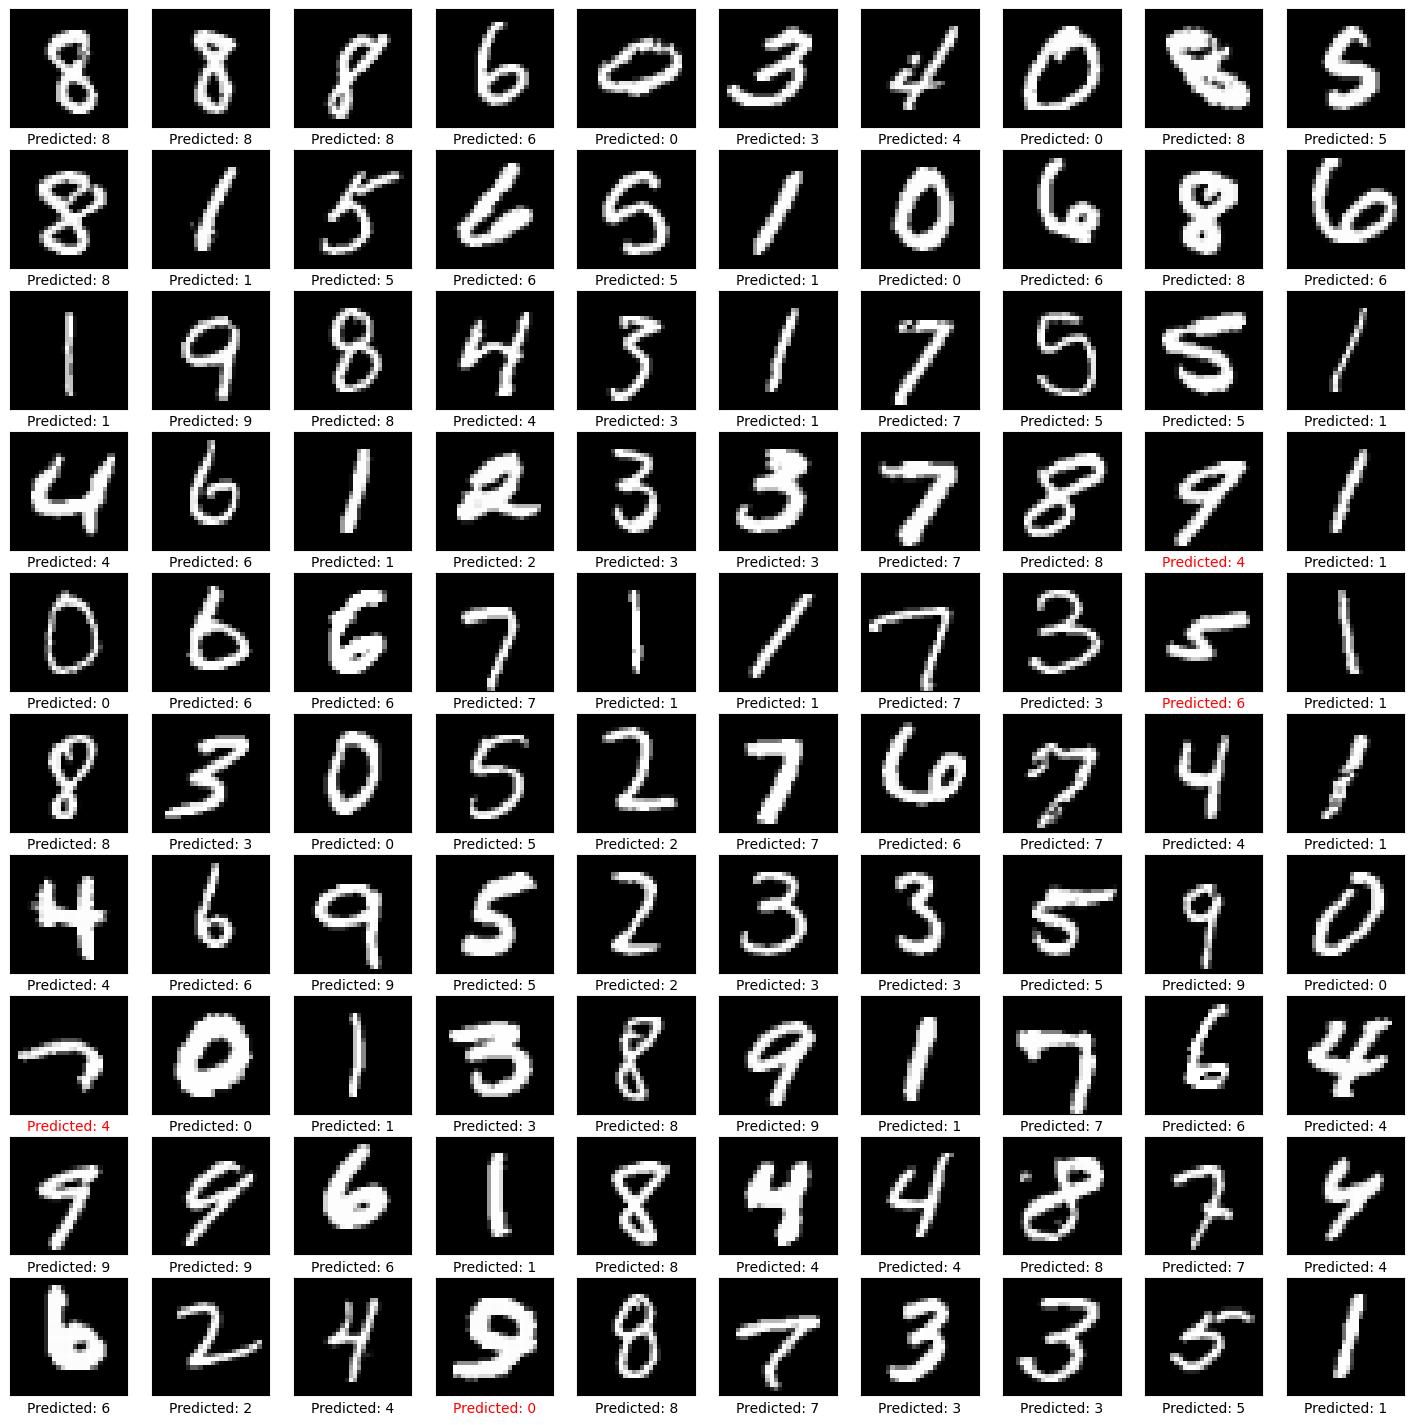

In [49]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Predict the labels of digit images in our test dataset.
predictions = model.predict(test_images)

# As the model output 10 float representing the probability of the input image
# being a digit from 0 to 9, we need to find the largest probability value
# to find out which digit the model predicts to be most likely in the image.
prediction_digits = np.argmax(predictions, axis=1)

# Then plot 100 random test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()

In [50]:
# Convert Keras model to TF Lite format.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_float_model = converter.convert()

# Show model size in KBs.
float_model_size = len(tflite_float_model) / 1024
print('Float model size = %dKBs.' % float_model_size)

INFO:tensorflow:Assets written to: C:\Users\Xiaojun\AppData\Local\Temp\tmp6s4bgtl8\assets


INFO:tensorflow:Assets written to: C:\Users\Xiaojun\AppData\Local\Temp\tmp6s4bgtl8\assets


Float model size = 437KBs.


In [51]:
# Re-convert the model to TF Lite using quantization.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

# Show model size in KBs.
quantized_model_size = len(tflite_quantized_model) / 1024
print('Quantized model size = %dKBs,' % quantized_model_size)
print('which is about %d%% of the float model size.'\
    % (quantized_model_size * 100 / float_model_size))

INFO:tensorflow:Assets written to: C:\Users\Xiaojun\AppData\Local\Temp\tmp5bim1mhq\assets


INFO:tensorflow:Assets written to: C:\Users\Xiaojun\AppData\Local\Temp\tmp5bim1mhq\assets


Quantized model size = 113KBs,
which is about 26% of the float model size.


In [55]:
# A helper function to evaluate the TF Lite model using "test" dataset.
def evaluate_tflite_model(tflite_model):
  # Initialize TFLite interpreter using the model.
  interpreter = tf.lite.Interpreter(model_content=tflite_model)
  interpreter.allocate_tensors()
  input_tensor_index = interpreter.get_input_details()[0]["index"]
  output = interpreter.tensor(interpreter.get_output_details()[0]["index"])

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for test_image in test_images:
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_tensor_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  # Compare prediction results with ground truth labels to calculate accuracy.
  accurate_count = 0
  for index in range(len(prediction_digits)):
    if prediction_digits[index] == test_labels[index]:
      accurate_count += 1
  accuracy = accurate_count * 1.0 / len(prediction_digits)

  return accuracy

# Evaluate the TF Lite float model. You'll find that its accurary is identical
# to the original TF (Keras) model because they are essentially the same model
# stored in different format.
float_accuracy = evaluate_tflite_model(tflite_float_model)
print('Float model accuracy = %.4f' % float_accuracy)
print("done")


Float model accuracy = 0.9346
done


In [56]:
# Evalualte the TF Lite quantized model.
# Don't be surprised if you see quantized model accuracy is higher than
# the original float model. It happens sometimes :)
print("begin")
quantized_accuracy = evaluate_tflite_model(tflite_quantized_model)
print('Quantized model accuracy = %.4f' % quantized_accuracy)
print('Accuracy drop = %.4f' % (float_accuracy - quantized_accuracy))

begin
Quantized model accuracy = 0.9344
Accuracy drop = 0.0002


In [57]:
# Save the quantized model to file to the Downloads directory
f = open('mnist_write.tflite', "wb")
f.write(tflite_quantized_model)
f.close()

print("Finished.")

Finished.
